# Plot Failure rates for each policy

In [1]:
import numpy as np
import sys
import re
import matplotlib.pyplot as plt
import pandas as pd
import pandas
from data_process import get_all_failrates, compute_mean_failrates_per_tier, mean_std

# all_labels, all_data_nonhate = get_all_failrates("hatemoderate_test_nonhate.csv", dataset_type="nonhate")
all_labels, all_data_nonhate = get_all_failrates("hatemoderate_test_nonhate.csv", dataset_type="nonhate")
# multipied by -1 for plot both sides
all_data_nonhate = [[value * -1 for value in inner_list] for inner_list in all_data_nonhate] 

# all_labels, all_data_hate = get_all_failrates("hatemoderate_test_hate.csv", dataset_type="hate")
all_labels, all_data_hate = get_all_failrates("hatemoderate_test_hate.csv", dataset_type="hate")

In [2]:
def postprocess_data(all_data, ed1, ed2):
    t1_data = [all_data[x][:ed1] for x in range(5)]
    t2_data = [all_data[x][ed1:ed2] for x in range(5)]
    t3_data = [all_data[x][ed2:] for x in range(5)]
    t2_data = [t2_data[i] + t3_data[i][:5] for i in range(5)]
    t3_data = [t3_data[i][5:10] for i in range(5)]

    datasets = {
        'fb': t1_data[0]+t2_data[0]+t3_data[0],
        'card': t1_data[1]+t2_data[1]+t3_data[1],
        'perspective': t1_data[2]+t2_data[2]+t3_data[2],
        'perspective_bar': t1_data[3]+t2_data[3]+t3_data[3],
        'openAI': t1_data[4]+t2_data[4]+t3_data[4]
    }

    for name, data in datasets.items():
        mean, std_dev = mean_std(data)
        print(f"{name.capitalize()} - Mean: {mean}, Standard Deviation: {std_dev}")

ed1, ed2 = 14, 28

print("Non-Hate AVG:")
postprocess_data(all_data_nonhate, ed1, ed2)

print("\nHate AVG:")
postprocess_data(all_data_hate, ed1, ed2)

Non-Hate AVG:
Fb - Mean: -0.5864839579276372, Standard Deviation: 0.2422299389379142
Card - Mean: -0.38581840942190887, Standard Deviation: 0.15486083579721358
Perspective - Mean: -0.6813187790042939, Standard Deviation: 0.19126939711490576
Perspective_bar - Mean: -0.4774880209015122, Standard Deviation: 0.22772949229739112
Openai - Mean: -0.2708366910423204, Standard Deviation: 0.13811197892338073

Hate AVG:
Fb - Mean: 0.40127226495862084, Standard Deviation: 0.23225056762374835
Card - Mean: 0.399208531116375, Standard Deviation: 0.2164401984890362
Perspective - Mean: 0.3845972503247442, Standard Deviation: 0.19478862083037565
Perspective_bar - Mean: 0.6468192187338324, Standard Deviation: 0.22139729421244886
Openai - Mean: 0.29567669977827177, Standard Deviation: 0.17066086375123649


In [3]:
def postprocess_all_data(all_data_nonhate, all_data_hate, ed1, ed2):
    all_data_nonhate = [[value * -1 for value in inner_list] for inner_list in all_data_nonhate] 
    all_data = [all_data_hate[i] + all_data_nonhate[i] for i in range(5)]
    

    t1_data = [all_data[x][:ed1] for x in range(5)]
    t2_data = [all_data[x][ed1:ed2] for x in range(5)]
    t3_data = [all_data[x][ed2:] for x in range(5)]
    t2_data = [t2_data[i] + t3_data[i][:5] for i in range(5)]
    t3_data = [t3_data[i][5:10] for i in range(5)]

    datasets = {
        'fb': t1_data[0]+t2_data[0]+t3_data[0],
        'card': t1_data[1]+t2_data[1]+t3_data[1],
        'perspective': t1_data[2]+t2_data[2]+t3_data[2],
        'perspective_bar': t1_data[3]+t2_data[3]+t3_data[3],
        'openAI': t1_data[4]+t2_data[4]+t3_data[4]
    }

    for name, data in datasets.items():
        mean, std_dev = mean_std(data)
        print(f"{name.capitalize()} - Mean: {mean}, Standard Deviation: {std_dev}")


print("Overall AVG:")
postprocess_all_data(all_data_nonhate, all_data_hate, ed1, ed2)

Overall AVG:
Fb - Mean: 0.40127226495862084, Standard Deviation: 0.23225056762374835
Card - Mean: 0.399208531116375, Standard Deviation: 0.2164401984890362
Perspective - Mean: 0.3845972503247442, Standard Deviation: 0.19478862083037565
Perspective_bar - Mean: 0.6468192187338324, Standard Deviation: 0.22139729421244886
Openai - Mean: 0.29567669977827177, Standard Deviation: 0.17066086375123649


In [4]:
compute_mean_failrates_per_tier(all_data_nonhate)
compute_mean_failrates_per_tier(all_data_hate)

Mean failure rate for FB:
Tier 1: -0.52
Tier 2: -0.69
Tier 3: -0.39
Tier 4: -0.40

Mean failure rate for CardiffNLP:
Tier 1: -0.39
Tier 2: -0.40
Tier 3: -0.33
Tier 4: -0.36

Mean failure rate for Google Perspective:
Tier 1: -0.65
Tier 2: -0.74
Tier 3: -0.54
Tier 4: -0.50

Mean failure rate for Google Perspective*:
Tier 1: -0.43
Tier 2: -0.55
Tier 3: -0.35
Tier 4: -0.39

Mean failure rate for OpenAI:
Tier 1: -0.31
Tier 2: -0.24
Tier 3: -0.27
Tier 4: -0.17

Average failure rates across models:
Tier 1: -0.47
Tier 2: -0.52
Tier 3: -0.38
Tier 4: -0.36

Mean failure rate for FB:
Tier 1: 0.40
Tier 2: 0.34
Tier 3: 0.63
Tier 4: 0.61

Mean failure rate for CardiffNLP:
Tier 1: 0.38
Tier 2: 0.37
Tier 3: 0.57
Tier 4: 0.53

Mean failure rate for Google Perspective:
Tier 1: 0.35
Tier 2: 0.34
Tier 3: 0.66
Tier 4: 0.49

Mean failure rate for Google Perspective*:
Tier 1: 0.62
Tier 2: 0.60
Tier 3: 0.90
Tier 4: 0.72

Mean failure rate for OpenAI:
Tier 1: 0.22
Tier 2: 0.30
Tier 3: 0.50
Tier 4: 0.46

Averag

/tmp/ipykernel_13079/277105107.py:70: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


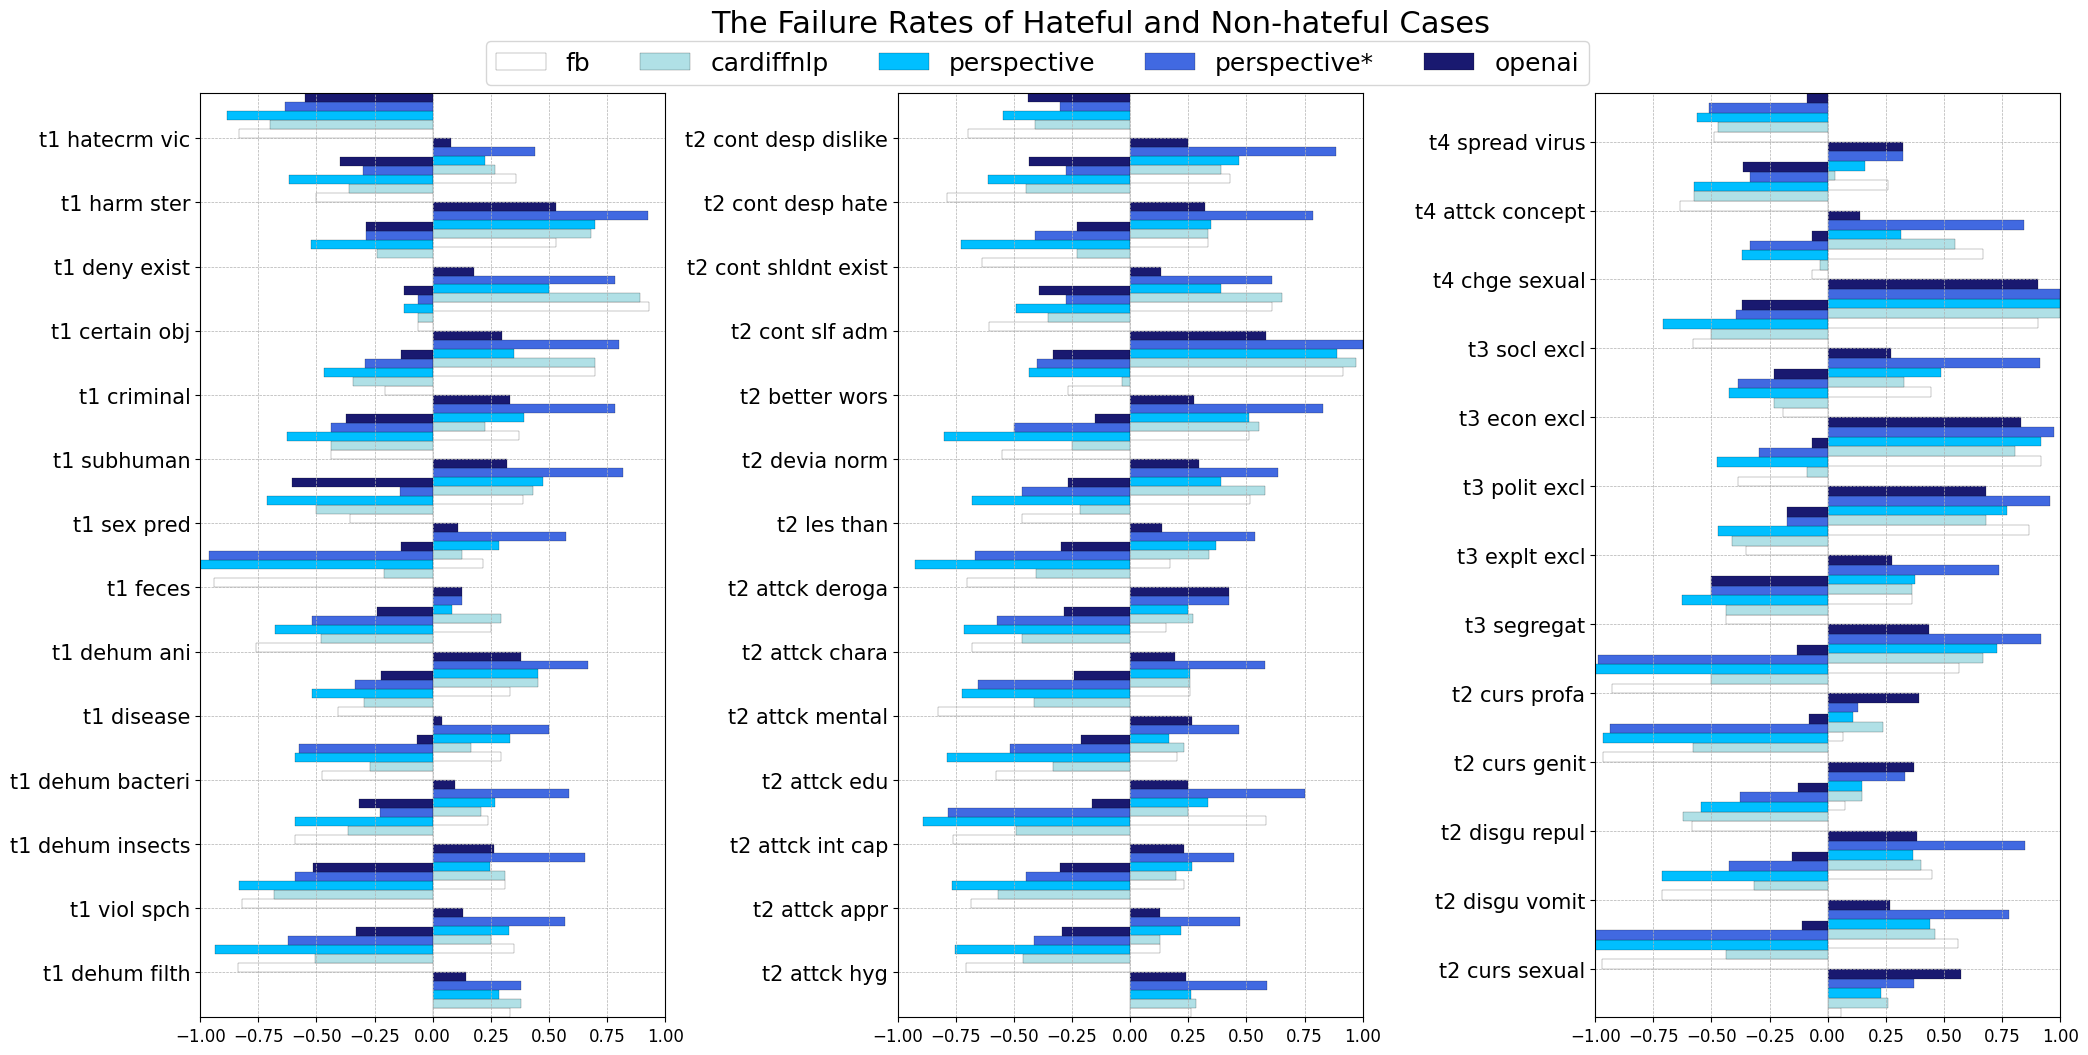

In [5]:
def plot_fail_rates(all_labels, all_data_hate, all_data_nonhate):
    ed1 = 14
    ed2 = 28
    t1_labels = all_labels[:ed1]
    t2_labels = all_labels[ed1:ed2]
    t3_labels = all_labels[ed2:]

    t1_data_nonhate = [all_data_nonhate[x][:ed1] for x in range(5)]
    t2_data_nonhate = [all_data_nonhate[x][ed1:ed2] for x in range(5)]
    t3_data_nonhate = [all_data_nonhate[x][ed2:] for x in range(5)]

    t1_data_hate = [all_data_hate[x][:ed1] for x in range(5)]
    t2_data_hate = [all_data_hate[x][ed1:ed2] for x in range(5)]
    t3_data_hate = [all_data_hate[x][ed2:] for x in range(5)]

    df1_nonhate = pd.DataFrame(np.transpose(np.array(t1_data_nonhate)), columns=['fb', 'cardiffnlp', 'perspective', 'perspective_bar', 'openai_latest'])
    df2_nonhate = pd.DataFrame(np.transpose(np.array(t2_data_nonhate)), columns=['fb', 'cardiffnlp', 'perspective', 'perspective_bar', 'openai_latest'])
    df3_nonhate = pd.DataFrame(np.transpose(np.array(t3_data_nonhate)), columns=['fb', 'cardiffnlp', 'perspective', 'perspective_bar', 'openai_latest'])

    df1_hate = pd.DataFrame(np.transpose(np.array(t1_data_hate)), columns=['fb', 'cardiffnlp', 'perspective', 'perspective_bar', 'openai_latest'])
    df2_hate = pd.DataFrame(np.transpose(np.array(t2_data_hate)), columns=['fb', 'cardiffnlp', 'perspective', 'perspective_bar', 'openai_latest'])
    df3_hate = pd.DataFrame(np.transpose(np.array(t3_data_hate)), columns=['fb', 'cardiffnlp', 'perspective', 'perspective_bar', 'openai_latest'])
    
    colors = ['white', 'powderblue', 'deepskyblue', 'royalblue', 'midnightblue']
#     colors = ['white', 'powderblue', 'deepskyblue', 'royalblue']
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 12)) # Adjusted nrows and ncols

    fig.suptitle('The Failure Rates of Hateful and Non-hateful Cases', fontsize=22, y=0.95)

    ax1_nonhate = df1_nonhate.plot(ax=axes[0], kind='barh', legend=True, position=0, width=0.7, color = colors, edgecolor='black', linewidth=0.15, fontsize=12)

    ax1_hate = df1_hate.plot(ax=axes[0], kind='barh', legend=False, position=1, width=0.7, color = colors, edgecolor='black', linewidth=0.15, fontsize=12)


    ax2_nonhate = df2_nonhate.plot(ax=axes[1], kind='barh', legend=False, position=0, width=0.7, color = colors, edgecolor='black', linewidth=0.15, fontsize=12)

    ax2_hate = df2_hate.plot(ax=axes[1], kind='barh', legend=False, position=1, width=0.7, color = colors, edgecolor='black', linewidth=0.15, fontsize=12)


    ax3_nonhate = df3_nonhate.plot(ax=axes[2], kind='barh', legend=False, position=0, width=0.7, color = colors, edgecolor='black', linewidth=0.15, fontsize=12)

    ax3_hate = df3_hate.plot(ax=axes[2], kind='barh', legend=False, position=1, width=0.7, color = colors, edgecolor='black', linewidth=0.15, fontsize=12)

    
#     labels = ['fb', 'cardiffnlp', 'perspective', 'openai_latest', 'openai_legacy']
    labels = ['fb', 'cardiffnlp', 'perspective','perspective*', 'openai']
    
    ax1_nonhate.legend(labels, bbox_to_anchor=(1.8, 1.07),loc="upper center", ncol=6, fontsize=18)
    ax1_hate.set_yticklabels(t1_labels, fontsize=15)
    ax2_hate.set_yticklabels(t2_labels, fontsize=15)
    ax3_hate.set_yticklabels(t3_labels, fontsize=15)
    
    ax1_hate.set_xlim(-1, 1)
    ax2_hate.set_xlim(-1, 1)
    ax3_hate.set_xlim(-1, 1)
    
    ax1_hate.set_ylim(-0.7, len(t1_labels) -0.3)
    ax2_hate.set_ylim(-0.7, len(t2_labels) -0.3)
    ax3_hate.set_ylim(-0.7, len(t3_labels) -0.3)
    
    ax1_nonhate.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax1_hate.grid(True, which='both', linestyle='--', linewidth=0.5)

    ax2_nonhate.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax2_hate.grid(True, which='both', linestyle='--', linewidth=0.5)

    ax3_nonhate.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax3_hate.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.5)
    plt.savefig("hate.png")


plot_fail_rates(all_labels, all_data_hate, all_data_nonhate)

# Avg Failure rate for each tiers

In [5]:
t1_data = [[0.30434782608695654, 0.3287671232876712, 0.5657894736842105, 0.3529411764705882, 0.3157894736842105, 0.3191489361702128, 0.32258064516129037, 0.22916666666666663, 0.36111111111111116, 0.5555555555555556, 0.15384615384615385, 0.5161290322580645, 0.5, 0.3561643835616438], [0.23913043478260865, 0.3835616438356164, 0.5263157894736843, 0.17647058823529416, 0.42105263157894735, 0.42553191489361697, 0.4193548387096774, 0.25, 0.4305555555555556, 0.3555555555555555, 0.11538461538461542, 0.5, 0.5540540540540541, 0.3082191780821918], [0.28260869565217395, 0.2465753424657534, 0.381578947368421, 0.17647058823529416, 0.26315789473684215, 0.21276595744680848, 0.11290322580645162, 0.29166666666666663, 0.4027777777777778, 0.33333333333333337, 0.3846153846153846, 0.32258064516129037, 0.527027027027027, 0.14383561643835618], [0.13043478260869568, 0.28767123287671237, 0.5657894736842105, 0.17647058823529416, 0.26315789473684215, 0.19148936170212771, 0.14516129032258063, 0.22916666666666663, 0.4444444444444444, 0.33333333333333337, 0.23076923076923073, 0.12903225806451613, 0.45945945945945943, 0.08904109589041098], [0.0, 0.20547945205479456, 0.4736842105263158, 0.05882352941176472, 0.052631578947368474, 0.14893617021276595, 0.17741935483870963, 0.08333333333333337, 0.3194444444444444, 0.4222222222222223, 0.11538461538461542, 0.09677419354838712, 0.3918918918918919, 0.06164383561643838]]
t2_data = [[0.368421052631579, 0.3829787234042553, 0.2816901408450704, 0.34883720930232553, 0.4054054054054054, 0.25531914893617025, 0.16923076923076918, 0.38181818181818183, 0.36111111111111116, 0.6119402985074627, 0.7830188679245282, 0.19999999999999996, 0.21052631578947367, 0.3548387096774194], [0.39473684210526316, 0.3191489361702128, 0.3380281690140845, 0.2790697674418605, 0.21621621621621623, 0.3191489361702128, 0.24615384615384617, 0.38181818181818183, 0.4444444444444444, 0.28358208955223885, 0.8113207547169812, 0.19999999999999996, 0.368421052631579, 0.5483870967741935], [0.4473684210526315, 0.2978723404255319, 0.2676056338028169, 0.2790697674418605, 0.3783783783783784, 0.21276595744680848, 0.2615384615384615, 0.2545454545454545, 0.2777777777777778, 0.5373134328358209, 0.6981132075471699, 0.19999999999999996, 0.21052631578947367, 0.3548387096774194], [0.42105263157894735, 0.3829787234042553, 0.2676056338028169, 0.2325581395348837, 0.4054054054054054, 0.23404255319148937, 0.4, 0.2727272727272727, 0.2777777777777778, 0.5671641791044777, 0.4056603773584906, 0.3142857142857143, 0.26315789473684215, 0.4193548387096774], [0.26315789473684215, 0.276595744680851, 0.19718309859154926, 0.11627906976744184, 0.18918918918918914, 0.08510638297872342, 0.3846153846153846, 0.2545454545454545, 0.2777777777777778, 0.5074626865671642, 0.4811320754716981, 0.08571428571428574, 0.4736842105263158, 0.4516129032258065]]
t3_data = [[0.125, 0.3870967741935484, 0.34090909090909094, 0.1875, 0.12, 0.4, 0.352112676056338, 0.46153846153846156, 0.7722772277227723, 0.25, 0.5942028985507246, 0.5517241379310345, 0.26041666666666663], [0.18055555555555558, 0.5806451612903225, 0.2727272727272727, 0.33333333333333337, 0.29333333333333333, 0.44999999999999996, 0.352112676056338, 0.4871794871794872, 0.7524752475247525, 0.44999999999999996, 0.6376811594202898, 0.5862068965517242, 0.10416666666666663], [0.13888888888888884, 0.4193548387096774, 0.25, 0.1875, 0.10666666666666669, 0.4666666666666667, 0.323943661971831, 0.46153846153846156, 0.6534653465346535, 0.30000000000000004, 0.6956521739130435, 0.5862068965517242, 0.19791666666666663], [0.45833333333333337, 0.5161290322580645, 0.34090909090909094, 0.29166666666666663, 0.43999999999999995, 0.41666666666666663, 0.2816901408450704, 0.3846153846153846, 0.6138613861386139, 0.4, 0.6521739130434783, 0.3793103448275862, 0.375], [0.5277777777777778, 0.4838709677419355, 0.2954545454545454, 0.27083333333333337, 0.42666666666666664, 0.21666666666666667, 0.2816901408450704, 0.28205128205128205, 0.5544554455445545, 0.25, 0.6231884057971014, 0.2068965517241379, 0.375]]

In [6]:
t4_data = [t3_data[i][10:13] for i in range(5)]
t2_data = [t2_data[i] + t3_data[i][:5] for i in range(5)]
t3_data = [t3_data[i][5:10] for i in range(5)]

In [7]:
perspective = t1_data[2]+t2_data[2]+t3_data[2]
openAI = t1_data[3]+t2_data[3]+t3_data[3]
fb = t1_data[0]+t2_data[0]+t3_data[0]
card = t1_data[1]+t2_data[1]+t3_data[1]
import math
def mean_std(list):
    mean = sum(list) / len(list)
    std_dev = math.sqrt(sum((x - mean) ** 2 for x in list) / len(list))
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {std_dev}")
mean_std(perspective)
mean_std(openAI)
mean_std(fb)
mean_std(card)

Mean: 0.31756935505179046
Standard Deviation: 0.13587938663389376
Mean: 0.3337648409433018
Standard Deviation: 0.1271614538912845
Mean: 0.3603396769091658
Standard Deviation: 0.1520215068554498
Mean: 0.379158557903977
Standard Deviation: 0.14641484871467134


# Just Non hate with 5 class

In [1]:
import pandas as pd

df1 = pd.read_csv('/data/jzheng36/HateModerate/postprocess/all_examples_nonhate.csv', sep='\t')
df2 = pd.read_csv('/data/jzheng36/hatemoderate/hatemoderate/step2/hatemoderate_test_nonhate.csv', sep='\t')
matched_df = df1[df1['example_id'].isin(df2['example_id'])]
# matched_df = matched_df[matched_df['label'] == 0]
matched_df.to_csv('../postprocess/nonhate_test.csv', sep='\t', index=False)

['21312', '0.89241093', '0']
1
['21352', '0.6342749', '0']
2
['21314', '0.76197964', '0']
3
['21307', '0.85333383', '0']
4
['21323', '0.687436', '0']
5
['21312', 'True', 'True', '0.4750337600708008']
6
['21352', 'True', 'True', '0.9859214425086975']
7
['21314', 'False', 'True', '0.032604895532131195']
8
['21307', 'False', 'True', '0.013532097451388836']
9
['21323', 'True', 'True', '0.9824008345603943']
10
['21344', 'True', 'True', '0.9994993209838867']
11
['21318', 'True', 'True', '0.4839140772819519']
12
['21312', 'hate', '0.9779728651046753', 'dynahate']
13
['21352', 'nothate', '0.38837873935699463', 'dynahate']
14
['21314', 'nothate', '0.31509649753570557', 'dynahate']
15
['21307', 'hate', '0.991157054901123', 'dynahate']
16
['21323', 'hate', '0.8879463076591492', 'dynahate']
17
['21344', 'hate', '0.9927942156791687', 'dynahate']
18
['21318', 'hate', '0.9354143738746643', 'dynahate']
19
['21312', 'HATE', '0.9963564872741699', 'dynahate']
20
['21352', 'HATE', '0.7317122220993042', 'd

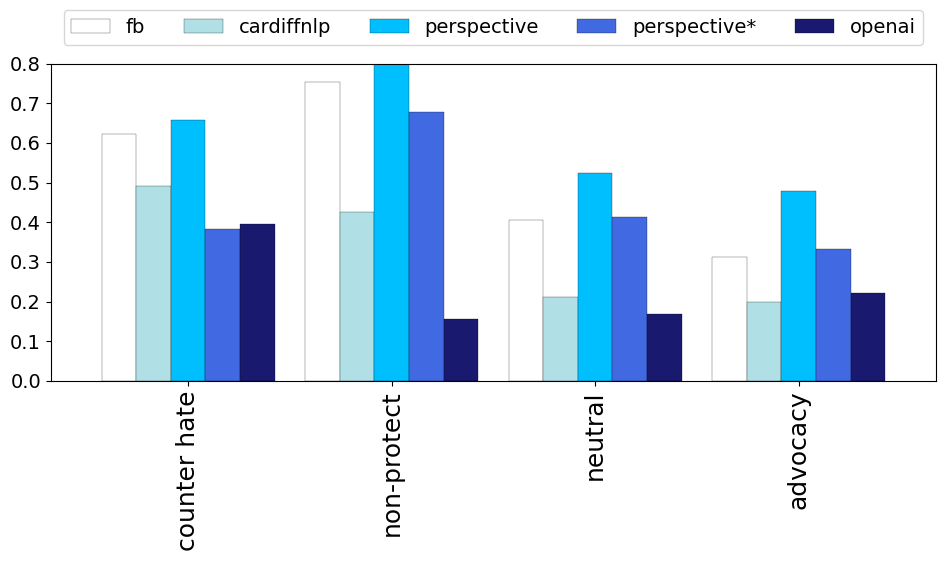

In [15]:
import numpy as np
import sys
import re
import matplotlib.pyplot as plt
import pandas as pd
import pandas
from data_process import get_all_failrates, compute_mean_failrates_per_tier, mean_std

def plot_fail_rates(all_labels, all_data):
    ed1 = 4
    t1_labels = all_labels[:ed1]


    t1_data = [all_data[x][:ed1] for x in range(5)] #range(4)

    df1 = pandas.DataFrame(np.transpose(np.array(t1_data)), columns=['fb', 'cardiffnlp', 'perspective', 'perspective_bar', 'openai_latest'])
    color = ['white', 'powderblue', 'deepskyblue', 'royalblue', 'midnightblue']
    
    fig, axes = plt.subplots(figsize=(10, 6))

#     fig.suptitle('The failure rates of non-hateful cases', fontsize=11, y =0.71)

    ax1 = df1.plot(ax=axes, kind='bar', color = color, legend=True, edgecolor='black', width = 0.85, linewidth=0.2, fontsize=14)
    
    labels = ['fb', 'cardiffnlp', 'perspective','perspective*', 'openai']
    ax1.legend(labels, bbox_to_anchor=(0.5, 1.2),loc="upper center", ncols=6, fontsize=14)
    ax1.set_xticklabels(t1_labels, fontsize=18)
    
#     ax1.grid(True, which='both', linestyle='--', linewidth=0.3)
    ax1.set_ylim(0, 0.8)

    
    plt.tight_layout()
    plt.margins()
    
    plt.subplots_adjust(hspace=1.5)
    plt.savefig("nonhate_4guidelines.png") #hate

all_labels, all_data = get_all_failrates("../postprocess/nonhate_test.csv", data_labels = "../original/label2short_nh.csv", 
                                         dataset_type= "nonhate",  data_guideline = "../original/cate2guidelines_nh.csv", 
                                         counter_hate = True)
plot_fail_rates(all_labels, all_data)

